In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_log_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore')

vietcombank

In [2]:
vcb = pd.read_csv('/content/VCB.csv',sep=";")
vcb= vcb.dropna() # Drop missing values
vcb = vcb.reset_index(drop=True) # Reset the index

vcb

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,22899,23115,23384,22846,1.95M,0
1,01/06/2016,23169,22899,23277,22899,1.20M,0
2,01/07/2016,22899,23061,23115,22630,1.61M,0
3,01/08/2016,22738,22792,22953,22468,1.17M,0
4,01/11/2016,22576,22738,22846,22522,1.28M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,80900,81000,81000,80300,2.03M,0
1992,12/22/2023,80900,80900,81100,80400,1.58M,0
1993,12/25/2023,81800,80900,81800,80700,1.30M,0
1994,12/26/2023,82800,82000,82800,82000,971.20K,0


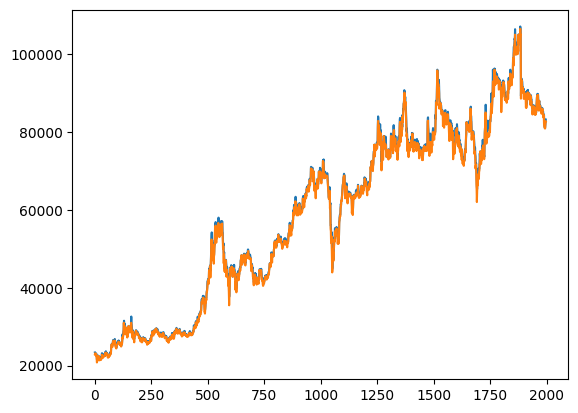

In [3]:
# gán biến
y = vcb[['Price']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
X = vcb[['High']] # các biến độc lập
plt.plot(X)
plt.plot(y)
plt.show()

In [4]:
# chia train, test
train_size = int(0.9 * len(vcb))
test_size = len(vcb) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [5]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(X_train, y_train)


SVR(kernel='sigmoid')

In [6]:
# dự đoán giá đóng cửa của stock price trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(X_test)
y_pred_sigmoid= y_pred_sigmoid.reshape(-1,1)

In [7]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)
rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
msle_poly = mean_squared_log_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
msle_sigmoid = mean_squared_log_error(y_test, y_pred_sigmoid)
rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [8]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MSLE: ", msle_rbf)
print("RBF RMSE:", rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MSLE:", msle_poly)
print("Poly RMSE:", rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MSLE:", msle_sigmoid)
print("Sigmoid RMSE:", rmse_sigmoid)

RBF MAPE: 3.7349153907912975
RBF MSLE:  0.005601016768820336
RBF RMSE: Price    7006.542727
dtype: float64
Poly MAPE: 8.532327121331608
Poly MSLE: 0.007924741615829416
Poly RMSE: Price    9085.897211
dtype: float64
Sigmoid MAPE: 38.31868636802133
Sigmoid MSLE: 0.23949436905014487
Sigmoid RMSE: Price    35492.423654
dtype: float64


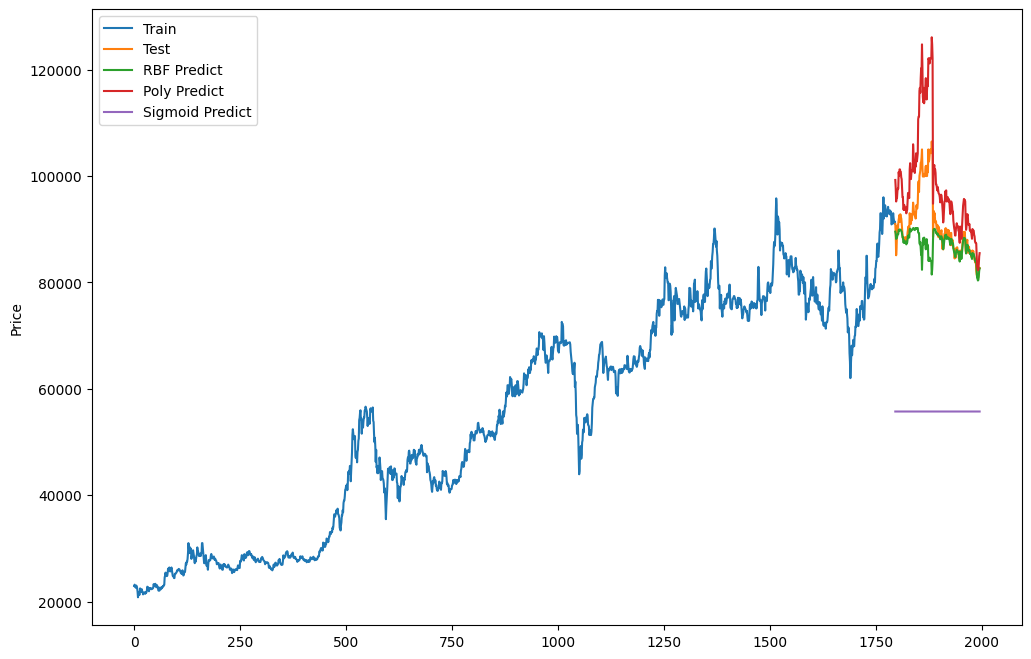

In [9]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
#lấy giá trị Price của ngày cuối cùng trong dataset
last_index = vcb.index[-1]
last_row = vcb.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[82700]])

In [11]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf = []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Price của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([82112.83735147]), array([81509.04808554]), array([80884.1264758]), array([80234.78243517]), array([79559.06668714]), array([78856.5545896]), array([78128.526018]), array([77378.06917988]), array([76610.03603074]), array([75830.79660135]), array([75047.78290491]), array([74268.87144553]), array([73501.70545591]), array([72753.08004277]), array([72028.49408811]), array([71331.92149824]), array([70665.79530023]), array([70031.15446746]), array([69427.88577454]), array([68854.99812219]), array([68310.88423594]), array([67793.54437068]), array([67300.76264915]), array([66830.23702358]), array([66379.66917964]), array([65946.82252026]), array([65529.55616057]), array([65125.84172277]), array([64733.7683079]), array([64351.5396836])]
Kết quả dự đoán sử dụng Poly: [array([63977.46660516]), array([63609.95631248]), array([63247.5005963]), array([62888.663364]), array([62532.06831794]), array([62176.3871507]), array([61820.32853542]), array([61462.62812384]),

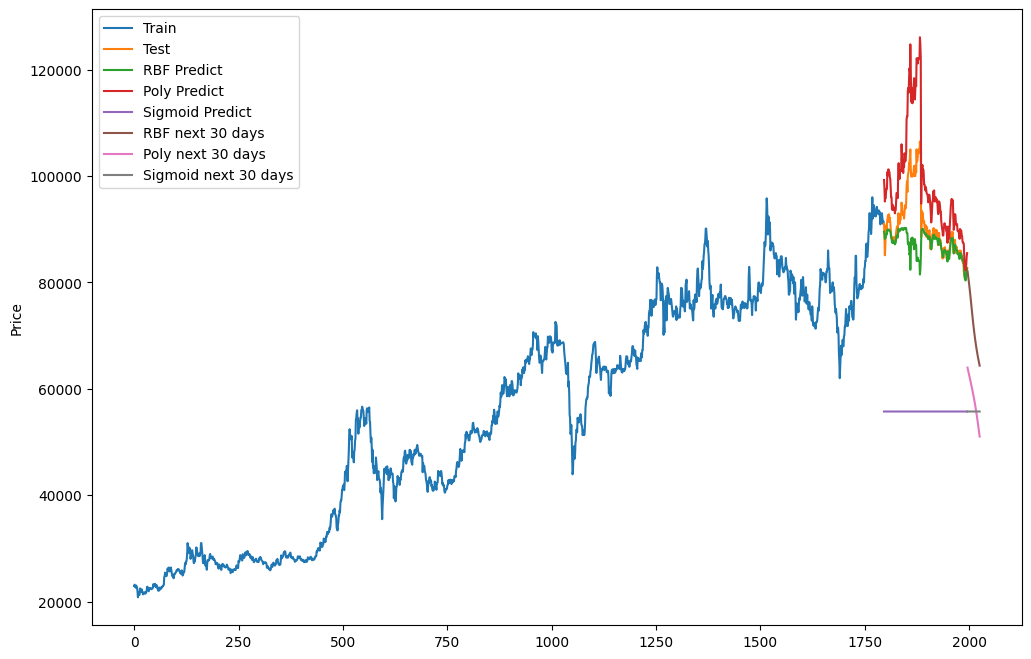

In [13]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid next 30 days')

plt.ylabel('Price')
plt.legend()
plt.show()

MB bank

In [14]:
mbb = pd.read_csv('/content/MBB.csv')
mbb = mbb.dropna() # Drop missing values
mbb = mbb.reset_index(drop=True) # Reset the index

mbb

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,4894,4894,4964,4894,1.07M,0
1,01/06/2016,4929,4894,4929,4894,670.50K,0
2,01/07/2016,4859,4929,4929,4859,1.61M,0
3,01/08/2016,4824,4824,4859,4789,1.73M,0
4,01/11/2016,4789,4824,4859,4789,1.12M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,18150,18100,18150,18000,3.98M,0
1992,12/22/2023,18300,18150,18450,18100,8.55M,0
1993,12/25/2023,18400,18350,18550,18300,6.59M,0
1994,12/26/2023,18450,18400,18500,18300,4.26M,0


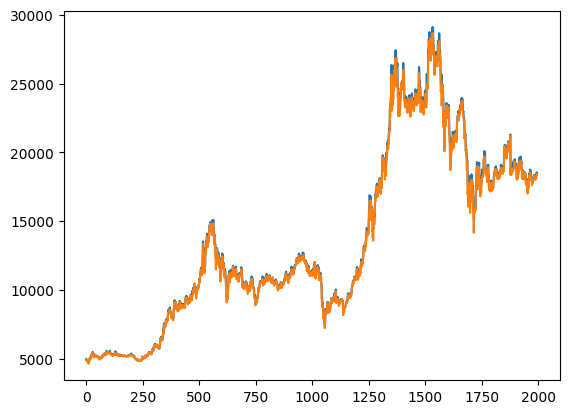

In [15]:
# gán biến
y = mbb[['Price']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
X = mbb[['High']] # các biến độc lập
plt.plot(X)
plt.plot(y)
plt.show()

In [16]:
# chia train, test
train_size = int(0.9 * len(mbb))
test_size = len(mbb) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [17]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(X_train, y_train)

SVR(kernel='sigmoid')

In [18]:
# dự đoán giá đóng cửa của stock price trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(X_test)
y_pred_sigmoid= y_pred_sigmoid.reshape(-1,1)

In [19]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)
rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
msle_poly = mean_squared_log_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
msle_sigmoid = mean_squared_log_error(y_test, y_pred_sigmoid)
rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [20]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MSLE: ", msle_rbf)
print("RBF RMSE:", rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MSLE:", msle_poly)
print("Poly RMSE:", rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MSLE:", msle_sigmoid)
print("Sigmoid RMSE:", rmse_sigmoid)

RBF MAPE: 0.7500532143884432
RBF MSLE:  7.705129624100212e-05
RBF RMSE: Price    162.851083
dtype: float64
Poly MAPE: 6.288176128822859
Poly MSLE: 0.004386322979163635
Poly RMSE: Price    1180.28077
dtype: float64
Sigmoid MAPE: 41.378527676079564
Sigmoid MSLE: 0.2879109391490479
Sigmoid RMSE: Price    7761.678623
dtype: float64


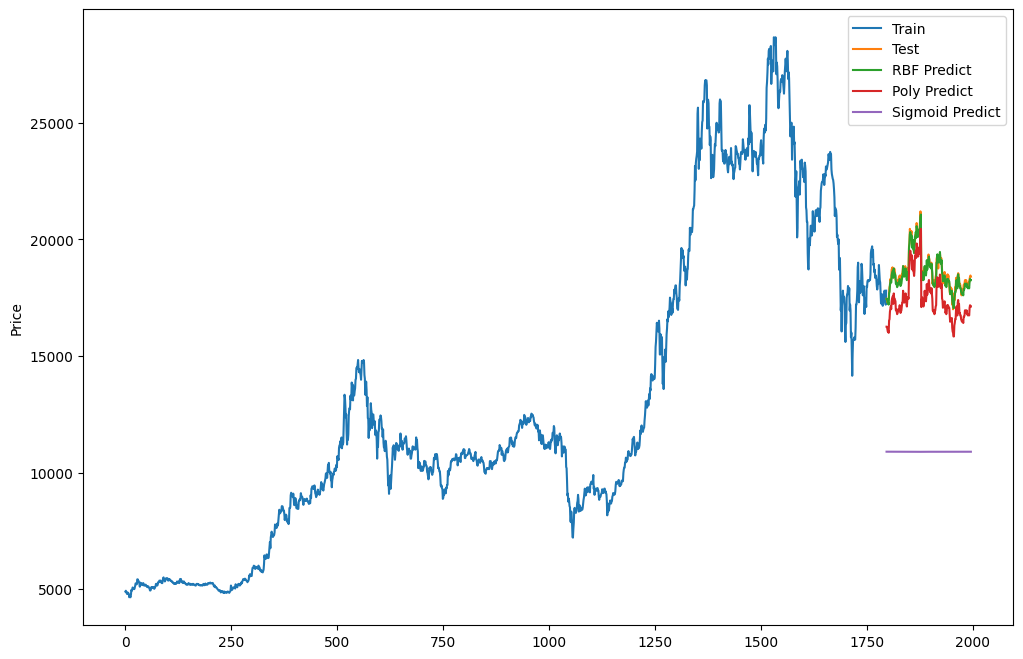

In [21]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
# lấy giá trị Price của ngày cuối cùng trong dataset
last_index = mbb.index[-1]
last_row = mbb.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[18400]])

In [23]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf = []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Price của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([18149.4914828]), array([17898.46139185]), array([17647.70998853]), array([17398.10849145]), array([17150.54843819]), array([16905.89055352]), array([16664.91889706]), array([16428.30505203]), array([16196.58521413]), array([15970.15080655]), array([15749.25126544]), array([15534.00631208]), array([15324.42447796]), array([15120.42476617]), array([14921.85887828]), array([14728.53216036]), array([14540.22213271]), array([14356.69405405]), array([14177.71339513]), array([14003.05536561]), array([13832.51178356]), array([13665.89563549]), array([13503.04368059]), array([13343.81743011]), array([13188.10279995]), array([13035.80870138]), array([12886.86480618]), array([12741.21870018]), array([12598.83262166]), array([12459.67996655])]
Kết quả dự đoán sử dụng Poly: [array([12323.74172804]), array([12191.00302211]), array([12061.44983139]), array([11935.06607655]), array([11811.83109794]), array([11691.71760227]), array([11574.69009981]), array([11460.70

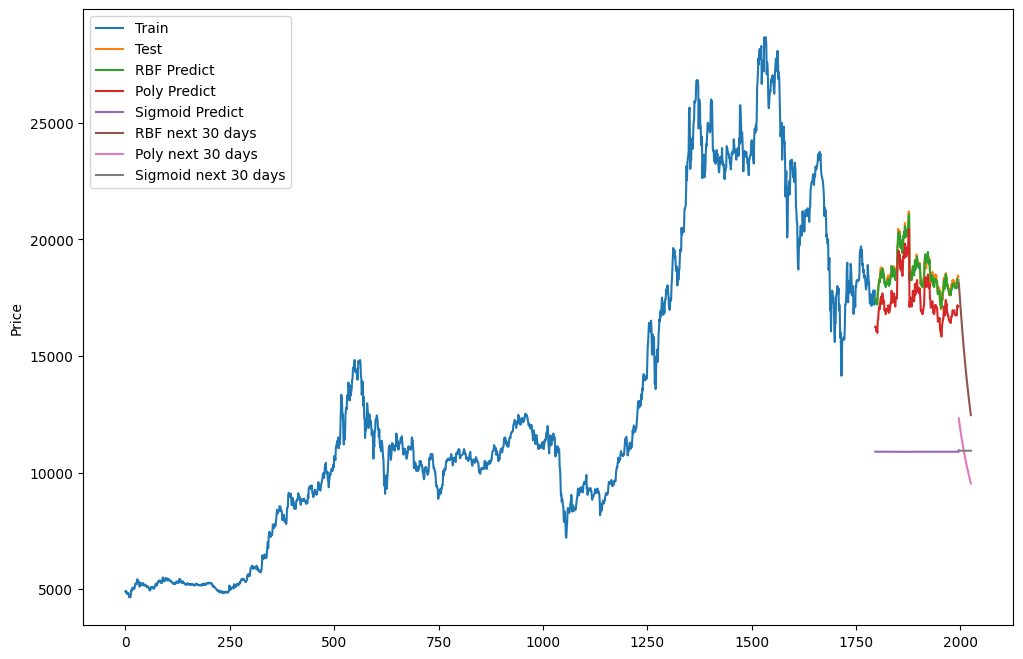

In [25]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid next 30 days')

plt.ylabel('Price')
plt.legend()
plt.show()

BIDV

In [26]:
bidv = pd.read_csv('/content/BIDV.csv')
bidv = bidv.dropna() # Drop missing values
bidv = bidv.reset_index(drop=True) # Reset the index

bidv

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,14155,14225,14366,14085,1.39M,0
1,01/06/2016,14225,14085,14296,14085,1.13M,0
2,01/07/2016,13592,14155,14225,13380,3.25M,0
3,01/08/2016,13240,13592,13592,12887,1.53M,0
4,01/11/2016,13380,13380,13592,13310,1.14M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,41800,40900,41900,40900,1.14M,0
1992,12/22/2023,42450,41800,42450,41400,1.19M,0
1993,12/25/2023,43200,42500,43300,42000,1.17M,0
1994,12/26/2023,43000,43200,43550,42700,1.16M,0


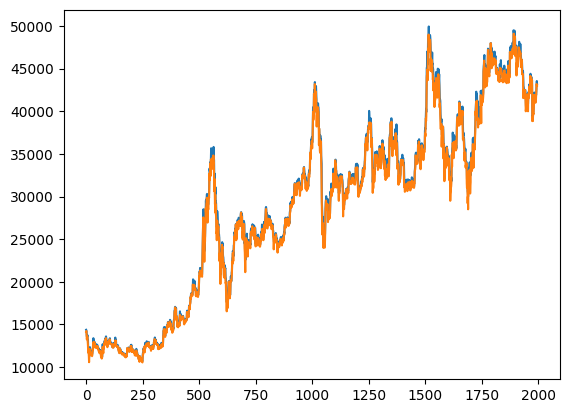

In [27]:
# gán biến
y = bidv[['Price']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
X = bidv[['High']] # các biến độc lập
plt.plot(X)
plt.plot(y)
plt.show()

In [28]:
# chia train, test
train_size = int(0.9 * len(bidv))
test_size = len(bidv) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [29]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(X_train, y_train)

SVR(kernel='sigmoid')

In [30]:
# dự đoán giá đóng cửa của stock price trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(X_test)
y_pred_sigmoid= y_pred_sigmoid.reshape(-1,1)

In [31]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)
rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
msle_poly = mean_squared_log_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
msle_sigmoid = mean_squared_log_error(y_test, y_pred_sigmoid)
rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [32]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MSLE: ", msle_rbf)
print("RBF RMSE:", rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MSLE:", msle_poly)
print("Poly RMSE:", rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MSLE:", msle_sigmoid)
print("Sigmoid RMSE:", rmse_sigmoid)

RBF MAPE: 1.2582974043952082
RBF MSLE:  0.0003194915198996434
RBF RMSE: Price    822.626498
dtype: float64
Poly MAPE: 11.302538164274758
Poly MSLE: 0.012259015578677306
Poly RMSE: Price    5335.649004
dtype: float64
Sigmoid MAPE: 34.9698165208723
Sigmoid MSLE: 0.188777300863252
Sigmoid RMSE: Price    15699.458859
dtype: float64


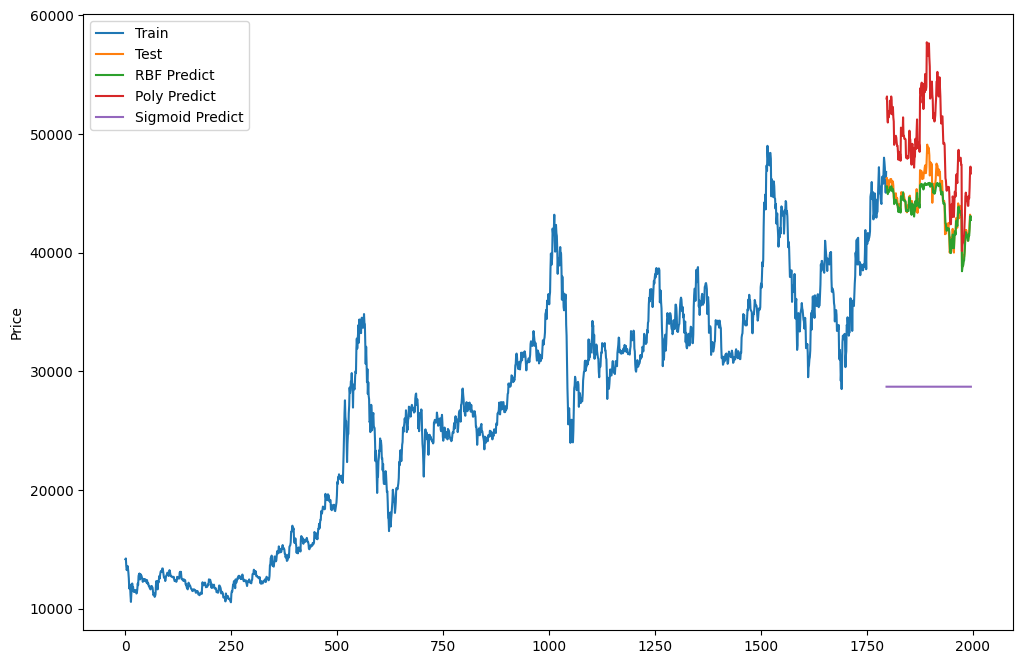

In [33]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
# lấy giá trị Price của ngày cuối cùng trong dataset
last_index = bidv.index[-1]
last_row = bidv.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[43000]])

In [35]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf = []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Price của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([42547.38987041]), array([42089.00980393]), array([41616.97516808]), array([41126.20718782]), array([40614.2511782]), array([40081.34825123]), array([39530.45910035]), array([38966.99892074]), array([38398.15704307]), array([37831.8628849]), array([37275.64514592]), array([36735.69695946]), array([36216.36054558]), array([35720.05799238]), array([35247.54472499]), array([34798.31351937]), array([34371.01007073]), array([33963.78304145]), array([33574.54378291]), array([33201.1413448]), array([32841.47051246]), array([32493.53209866]), array([32155.46165625]), array([31825.53863563]), array([31502.18429868]), array([31183.95386175]), array([30869.52634993]), array([30557.69432519]), array([30247.35481452]), array([29937.50225283])]
Kết quả dự đoán sử dụng Poly: [array([29627.22395484]), array([29315.69845689]), array([29002.19696673]), array([28686.08808141]), array([28366.84584792]), array([28044.06111491]), array([27717.45593089]), array([27386.9004

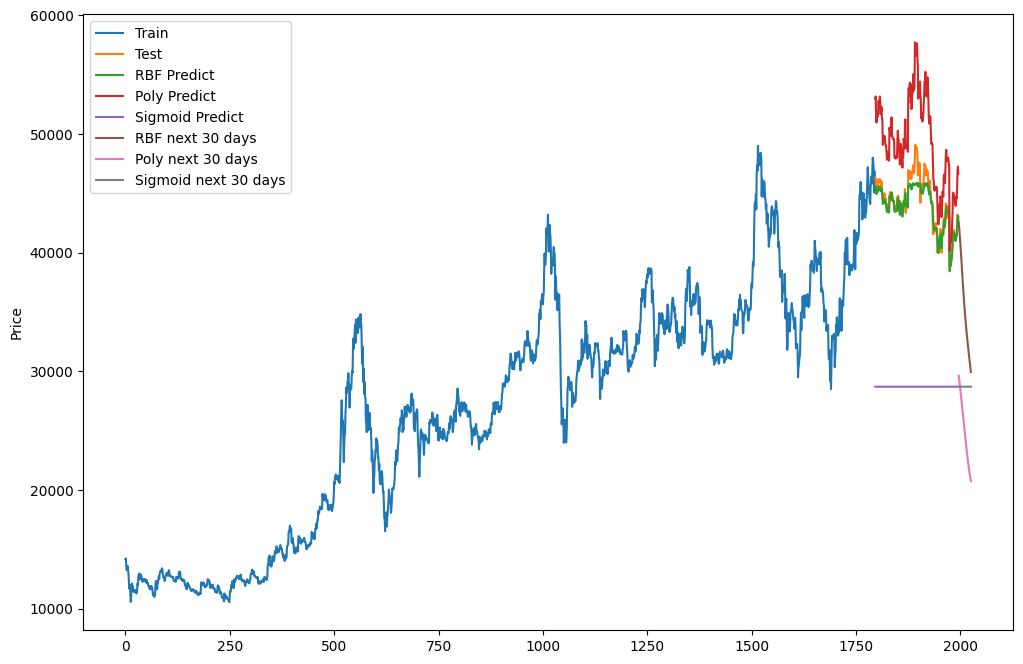

In [37]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid next 30 days')

plt.ylabel('Price')
plt.legend()
plt.show()